Add the project base directory to the path

In [194]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [195]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
from matplotlib import pyplot as plt
%matplotlib inline

import json

import numpy as np
import pandas as pd
import networkx as nx

## Make Ebola base graph

Load the population data

In [197]:
pop_df = pd.read_csv('../data/ebola/ebola_populations.csv', index_col='district')
pop_df.head()

,population
district,
BEYLA,248143
BOFFA,217743
BOKE,526569
CONAKRY,1729239
COYAH,407975


In [199]:
pop_df.population.sum()

20906683

In [71]:
pop_df['normed_pop'] = pop_df.population / pop_df.population.sum()
pop_df.head()

,population,normed_pop
district,,
BEYLA,248143,0.011869
BOFFA,217743,0.010415
BOKE,526569,0.025187
CONAKRY,1729239,0.082712
COYAH,407975,0.019514


Load the graph

In [72]:
base_graph = nx.read_edgelist('../data/ebola/ebola_net_edge_list.csv')
base_graph.number_of_nodes(), base_graph.number_of_edges()

(55, 127)

Add population metadata to each node

In [16]:
for name, row in pop_df.iterrows():
    base_graph.node[name]['size'] = row['normed_pop']

Save network under json format

In [17]:
import json
from networkx.readwrite import json_graph

base_graph_data = json_graph.node_link_data(base_graph)

with open('../data/ebola/ebola_base_graph.json', 'w') as f:
    json.dump(base_graph_data, f)

---

## Build example network

In [73]:
from graph_generation import make_ebola_network

In [189]:
graph = make_ebola_network(n_nodes=1500, p_in=0.3, p_out=0.1)
graph.number_of_nodes(), graph.number_of_edges()

(1501, 19060)

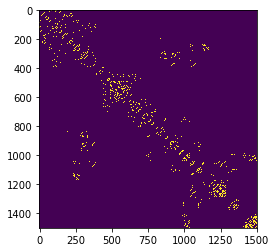

In [190]:
plt.imshow(nx.adjacency_matrix(graph).toarray());

In [191]:
nx.is_connected(graph)

True

In [193]:
len(list(graph.selfloop_edges()))

0